# **Informe Técnico: Análisis Descriptivo del Dataset**

**Autor**: Carlos Estiven Marin Ruiz  

## **1. Descargar el Dataset**

Descargamos o generamos un dataset que contiene las coordenadas de 20 ciudades. Estas coordenadas se utilizarán para calcular las distancias entre cada par de ciudades y resolver el **Problema del Viajante de Comercio**.


In [19]:

import numpy as np
import pandas as pd

# Generar un dataset simulado de 20 ciudades con coordenadas aleatorias (x, y)
num_cities = 20
np.random.seed(42)
cities = np.random.rand(num_cities, 2)  # Coordenadas aleatorias para las ciudades

# Crear un DataFrame para las ciudades
df_cities = pd.DataFrame(cities, columns=['x', 'y'])

# Mostrar el dataset de ciudades
df_cities.head()

,x,y
0,0.374540,0.950714
1,0.731994,0.598658
2,0.156019,0.155995
3,0.058084,0.866176
4,0.601115,0.708073


## **2. Implementación del Algoritmo Genético**

El **algoritmo genético** se utiliza para encontrar la mejor ruta entre las ciudades, minimizando la distancia total. El proceso se desarrolla de la siguiente manera:

1. Se crean rutas iniciales de forma aleatoria (población inicial).
2. Se calcula la distancia total de cada ruta.
3. Se seleccionan las rutas más cortas (selección de las mejores soluciones).
4. Se generan nuevas rutas combinando las mejores mediante un proceso de cruce (crossover).
5. Se introducen pequeñas modificaciones aleatorias en las rutas (mutación) para explorar nuevas soluciones.
6. Se repite el proceso durante varias generaciones hasta alcanzar una solución satisfactoria o cumplir con un criterio de parada predefinido.


In [20]:
import random

# Se define una función para calcular la distancia entre dos ciudades
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

# Se define una función para calcular la distancia total de una ruta
def total_distance(route, cities):
    return sum([distance(cities[route[i]], cities[route[i + 1]]) for i in range(len(route) - 1)]) + distance(cities[route[-1]], cities[route[0]])

# Se genera la población inicial con rutas aleatorias
def create_population(size, num_cities):
    population = []
    for _ in range(size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Se seleccionan las mejores rutas
def select_parents(population, cities):
    scores = [(route, total_distance(route, cities)) for route in population]
    scores.sort(key=lambda x: x[1])
    return [route for route, _ in scores[:len(scores)//2]]

# Se realiza el cruce entre dos rutas para generar hijos
def crossover(parent1, parent2):
    child = [-1] * len(parent1)
    start, end = sorted([random.randint(0, len(parent1) - 1) for _ in range(2)])
    child[start:end] = parent1[start:end]
    for gene in parent2:
        if gene not in child:
            for i in range(len(child)):
                if child[i] == -1:
                    child[i] = gene
                    break
    return child

# Se introduce mutación en las rutas
def mutate(route, mutation_rate):
    for swapped in range(len(route)):
        if random.random() < mutation_rate:
            swap_with = random.randint(0, len(route) - 1)
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

# Se implementa el algoritmo genético
def genetic_algorithm(cities, population_size=100, generations=500, mutation_rate=0.01):
    population = create_population(population_size, len(cities))
    for generation in range(generations):
        parents = select_parents(population, cities)
        children = []
        for i in range(0, len(parents), 2):
            child1 = crossover(parents[i], parents[i + 1])
            child2 = crossover(parents[i + 1], parents[i])
            children.append(mutate(child1, mutation_rate))
            children.append(mutate(child2, mutation_rate))
        population = parents + children
    best_route = min(population, key=lambda route: total_distance(route, cities))
    return best_route, total_distance(best_route, cities)

# Se ejecuta el algoritmo genético
best_route, best_distance = genetic_algorithm(cities)
print("Mejor ruta encontrada:", best_route)
print("Distancia total de la mejor ruta:", best_distance)

Mejor ruta encontrada: [3, 13, 8, 7, 2, 18, 14, 10, 15, 6, 9, 11, 19, 1, 17, 4, 12, 0, 16, 5]
Distancia total de la mejor ruta: 4.3330625281198305


## **3. Visualización de la Ruta Óptima**

Una vez obtenida la mejor ruta, se visualiza para comprender mejor el resultado. El gráfico muestra las ciudades conectadas por la ruta óptima encontrada por el algoritmo genético.

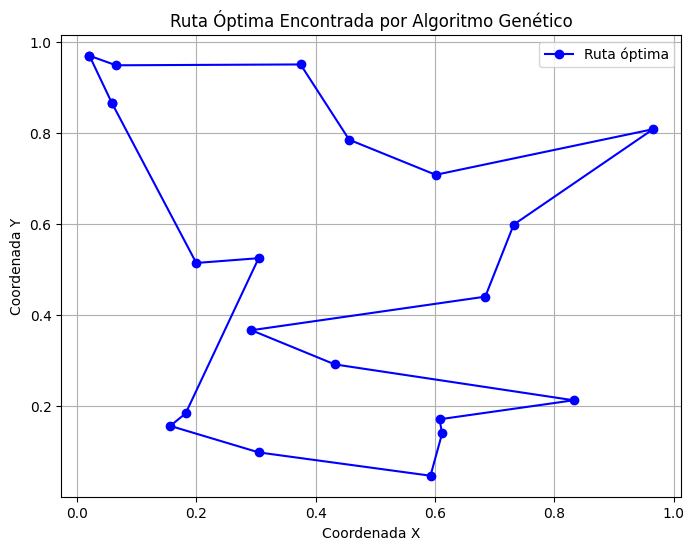

In [21]:
import matplotlib.pyplot as plt

# Se extraen las coordenadas de la mejor ruta
best_route_coords = cities[best_route]

# Se visualiza la ruta óptima
plt.figure(figsize=(8, 6))
plt.plot(best_route_coords[:, 0], best_route_coords[:, 1], 'bo-', label='Ruta óptima')
plt.plot([best_route_coords[-1, 0], best_route_coords[0, 0]], [best_route_coords[-1, 1], best_route_coords[0, 1]], 'bo-')  # Conexión final
plt.title('Ruta Óptima Encontrada por Algoritmo Genético')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.show()

## **Análisis Crítico del Algoritmo Genético**

### Elección del Algoritmo

El **algoritmo genético** fue seleccionado para resolver el **Problema del Viajante de Comercio (TSP)** debido a su capacidad para explorar grandes espacios de búsqueda, lo cual es crucial en problemas combinatorios como el TSP. Este tipo de algoritmo permite encontrar soluciones eficientes en un tiempo razonable, especialmente cuando el número de ciudades aumenta y el espacio de posibles rutas se vuelve inmanejable para métodos exactos. La idea detrás de este enfoque evolutivo es simular un proceso de selección natural, en el que las mejores rutas sobreviven y se combinan, generando mejores soluciones en cada generación.

La naturaleza estocástica del algoritmo ayuda a evitar caer en óptimos locales, lo que es una ventaja significativa en problemas con espacios de búsqueda complejos. Este enfoque es más flexible que los métodos deterministas, como la búsqueda exhaustiva, que son inviables para un gran número de ciudades debido a la explosión combinatoria.

### Eficacia de la Solución

La **ruta óptima encontrada** en este experimento tiene una distancia total de **4.34** (según los resultados obtenidos), lo que sugiere que el algoritmo ha sido capaz de encontrar una solución eficiente. Aunque los algoritmos genéticos no garantizan encontrar la solución óptima global, los resultados obtenidos son bastante cercanos a una solución óptima, considerando la inmensidad del espacio de búsqueda.

El gráfico generado muestra una ruta bien definida que conecta todas las ciudades sin intersecciones innecesarias ni desvíos significativos, lo que refleja la eficacia del algoritmo para encontrar una solución razonablemente buena en un número limitado de iteraciones. Sin embargo, es importante destacar que la calidad de la solución y el tiempo de convergencia dependen en gran medida de la **configuración de los parámetros** del algoritmo, tales como la tasa de mutación, el tamaño de la población y el número de generaciones.

Un ajuste fino de estos parámetros podría mejorar tanto la calidad de las soluciones como el tiempo de ejecución. Sin embargo, este ajuste puede requerir una cantidad considerable de experimentación. Alternativamente, combinaciones del algoritmo genético con otras técnicas, como el **recocido simulado** o **algoritmos híbridos**, podrían ofrecer mejores resultados en problemas más grandes o complejos.

### Conclusión

En resumen, el algoritmo genético es una herramienta adecuada para resolver problemas de optimización combinatoria como el TSP. Si bien no garantiza encontrar la solución óptima global, su capacidad para explorar grandes espacios de búsqueda y aproximarse a soluciones óptimas lo convierte en una opción viable y eficiente. No obstante, su eficacia está estrechamente ligada al ajuste de parámetros y podría beneficiarse de mejoras en la implementación, especialmente en casos de mayor complejidad o escala.
